<a href="https://colab.research.google.com/github/misramrinal/divyajoti-bhai-class/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from google.colab import files

data = files.upload()

Saving car.data to car.data


In [29]:
df = pd.read_csv("car.data", header=None)
df.rename(columns = {0:'Buying', 1:'Maint', 2:'Doors', 3:'Persons', 4:'Lug_boot', 5:'Safety', 6:'Classify'}, inplace = True)
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Classify
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
df.Classify.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [30]:
df.Buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [31]:
df.Maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [32]:
df.Lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug_boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Classify  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [48]:
df=df.replace(to_replace=['vhigh','high','med','low','5more','more'],value=[3,2,1,0,5,5])
df=df.replace(to_replace=['unacc','acc','vgood','good'],value=[0,1,3,2])
df['Lug_boot'] = df['Lug_boot'].replace(['small', 'med', 'big'], [0, 1, 2])
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Classify
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   int64 
 1   Maint     1728 non-null   int64 
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug_boot  1728 non-null   int64 
 5   Safety    1728 non-null   int64 
 6   Classify  1728 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 94.6+ KB


In [51]:
df = df.astype('int')

In [52]:
from sklearn.model_selection import train_test_split as tts

X = df.drop(['Classify'], axis=1)
Y = df['Classify']

x_train, x_test, y_train, y_test = tts(X, Y, train_size=0.2, random_state=0)


In [53]:
X.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Buying    1728 non-null   int64
 1   Maint     1728 non-null   int64
 2   Doors     1728 non-null   int64
 3   Persons   1728 non-null   int64
 4   Lug_boot  1728 non-null   int64
 5   Safety    1728 non-null   int64
dtypes: int64(6)
memory usage: 81.1 KB


In [56]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print(score)

0.8286334056399133


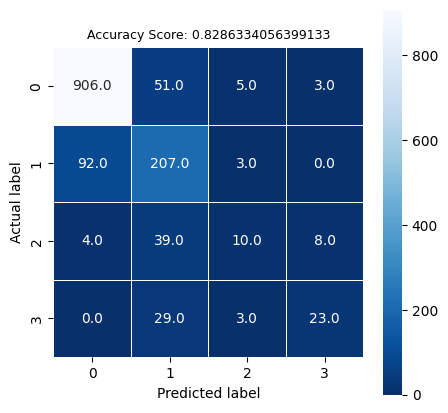

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(5,5))
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 9);

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score_knn = knn.score(x_test, y_test)
print(score_knn)

0.8741865509761388


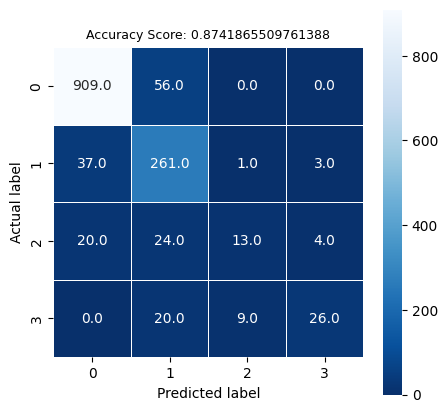

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(5,5))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_knn)
plt.title(all_sample_title, size = 9);

In [91]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly',gamma = 'auto', class_weight = 'balanced')
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
score_svc = svc.score(x_test, y_test)
print(score_svc)

0.9067245119305857


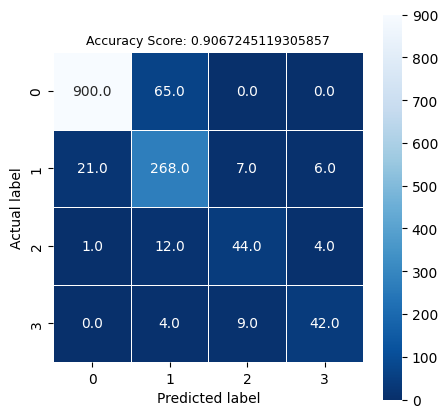

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(5,5))
cm = metrics.confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_svc)
plt.title(all_sample_title, size = 9);

In [119]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth=8)
dtc = dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
score_dtc = dtc.score(x_test, y_test)
print(score_dtc)

0.913232104121475


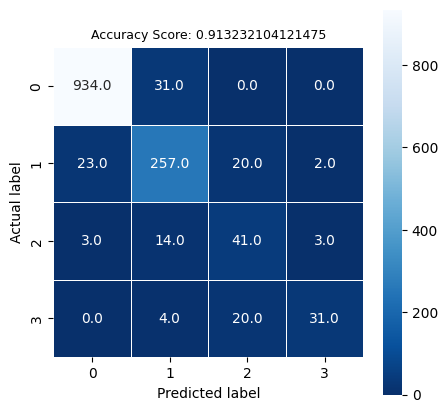

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure(figsize=(5,5))
cm = metrics.confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_dtc)
plt.title(all_sample_title, size = 9);